## Observations and Insights 

In [344]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_mouse = pd.merge(mouse_metadata,study_results, on="Mouse ID", how= "left")
# Display the data table for preview
merge_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [345]:
# Checking the number of mice.
mouse_count= merge_mouse.nunique()["Mouse ID"]
mouse_count

249

In [346]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
locate_dup = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [347]:
# Optional: Get all the data for the duplicate mouse ID. 


In [348]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Removing duplicate values in both datasets
clean_mouse_metadata=mouse_metadata[mouse_metadata['Mouse ID'].isin(locate_dup)==False]
clean_study_results=study_results[study_results['Mouse ID'].isin(locate_dup)==False]

# Creating a df with mouse ID
combined_df = pd.merge(clean_mouse_metadata, clean_study_results, on = "Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [349]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count= combined_df.nunique()["Mouse ID"]
clean_mouse_count

248

## Summary Statistics

In [378]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Grouping the df
group_df= combined_df.groupby('Drug Regimen')

tumor_mean=group_df['Tumor Volume (mm3)'].mean()
tumor_median=group_df['Tumor Volume (mm3)'].median()
tumor_variance=group_df['Tumor Volume (mm3)'].var()
tumor_std=group_df['Tumor Volume (mm3)'].std()
tumor_sem=group_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_df = pd.DataFrame({'mean': tumor_mean, 'median': tumor_median,'variance': tumor_variance,'standard Deviation': tumor_std, 'SEM': tumor_sem})

tumor_df.head()


,mean,median,variance,standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [379]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarize_df = combined_df.groupby('Drug Regimen')
# Using the aggregation method, produce the same summary statistics in a single line
summarize2_df = summarize_df.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summarize2_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements for Each Treatment Regimen')

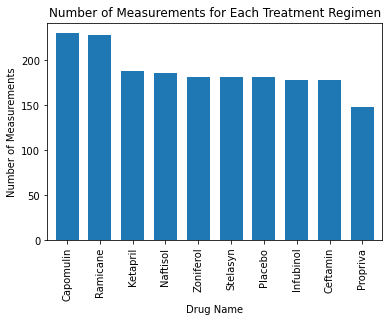

In [352]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Use value counts to find total number of measurements and create a width that spaces out the info
bar_plot =combined_df['Drug Regimen'].value_counts().plot.bar(width=.7)

# Create labels to and header
bar_plot.set_xlabel("Drug Name")
bar_plot.set_ylabel("Number of Measurements")
bar_plot.set_title("Number of Measurements for Each Treatment Regimen")


Text(0, 0.5, 'Number of Measurements')

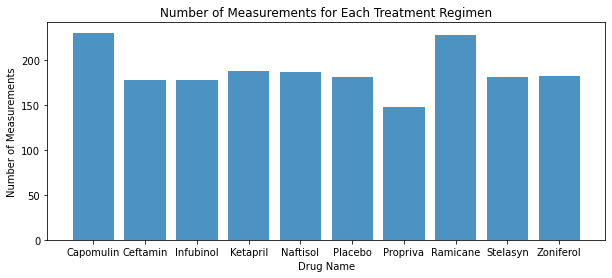

In [353]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Pull the regimen info from summary stat
d_reg=tumor_df.index.tolist()
# dreg

# Count how many times the drug had been used
count_reg= (combined_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

# Create the x-axis
x_axis = d_reg
plt.figure(figsize=(10,4))
plt.bar(x_axis, count_reg, alpha=.8, align="center")
plt.title("Number of Measurements for Each Treatment Regimen")
plt.xlabel("Drug Name")
plt.ylabel("Number of Measurements")


Text(0.5, 1.0, 'Male vs Female')

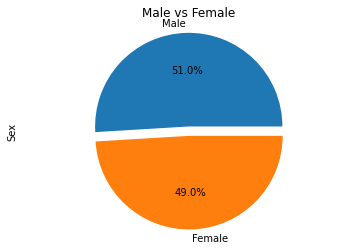

In [380]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.1,0)
pie_plot =combined_df['Sex'].value_counts().plot(kind='pie',autopct="%1.1f%%", explode=explode)


plt.axis('equal')
plt.title('Male vs Female')

([<matplotlib.patches.Wedge at 0x150e23afac0>,
 [Text(-0.79864235783093, -0.8956396509078041, 'Female'),
  Text(0.7320888280116862, 0.8210030133321533, 'Male')],
 [Text(-0.46587470873470915, -0.5224564630295523, '49.0%'),
  Text(0.39932117891546515, 0.4478198254539018, '51.0%')])

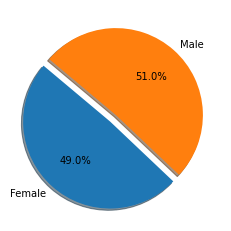

In [381]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot:
count_sex= (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()
explode = (0.1,0)
labels = ["Female","Male"]

plt.pie(count_sex, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [356]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Create a list for: Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_eval = combined_df.loc[combined_df['Drug Regimen'].isin(drugs)]

# Start by getting the last (greatest) timepoint for each mouse using sorting
tumor_vol_df = drug_eval.groupby(drug_eval['Mouse ID']).agg({'Timepoint':['max']})
tumor_vol_df.columns = ['Timepoint']

# Pick final value for each Regimen by looking at timepoint
tumor_vol_df = tumor_vol_df.reset_index()
# tumor_vol_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_final = pd.merge(tumor_vol_df, combined_df, how="left", on=["Mouse ID", "Timepoint"])
tumor_vol_final

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [357]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_per_drug = tumor_vol_final['Tumor Volume (mm3)'].loc[tumor_vol_final['Drug Regimen'] == drug]
    
    # add subset 
    tumor_vol.append(tumor_vol_per_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_per_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

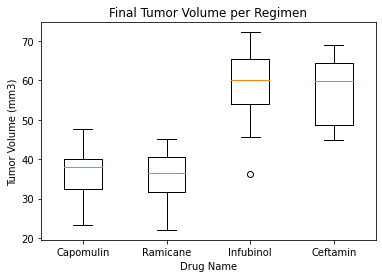

In [358]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimen')
ax.set_xticklabels(drugs)
ax.set_xlabel('Drug Name')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

In [359]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = combined_df.loc[combined_df['Mouse ID'] == 'x401']
# mouse_df

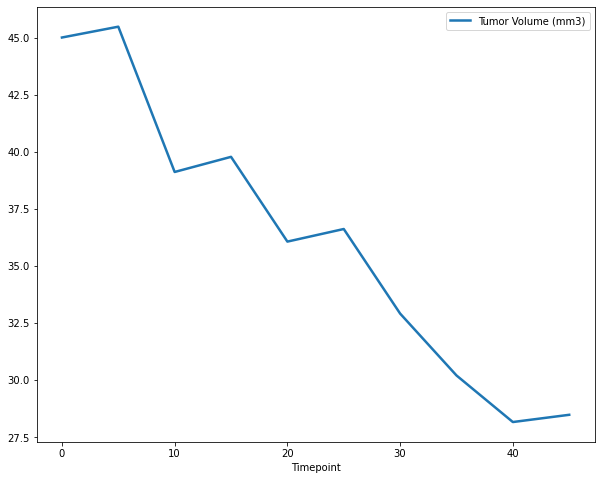

In [360]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Choose columns tumor vol and time point
mouse_df = mouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
# Plot the points and change size for appearance
mouse_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5)

## Correlation and Regression

In [361]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



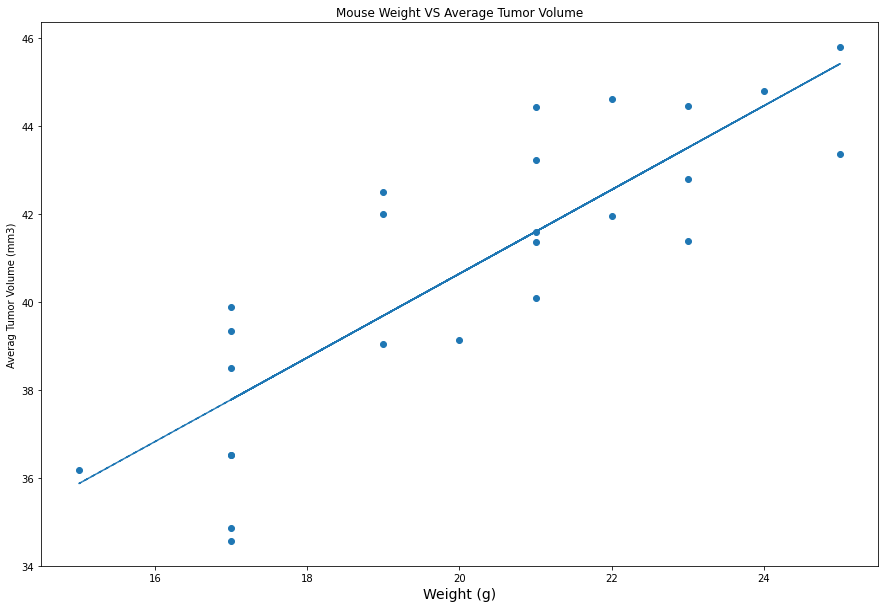

In [369]:
# Find Capomulin Regimen
capo_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
# Calculate Avg tumor vol
avg_capo_vol =capo_df.groupby(['Mouse ID']).mean()


# Plot graph and add labels
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(avg_capo_vol['Weight (g)'],avg_capo_vol['Tumor Volume (mm3)'])
plt.title('Mouse Weight VS Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

# Create x and y points
x_axis=avg_capo_vol['Weight (g)']
y_axis=avg_capo_vol['Tumor Volume (mm3)']

# Create and add the line of best fit to the original graph
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"--")

In [368]:
# Correlation coefficient
corr=st.pearsonr(avg_capo_vol['Weight (g)'],avg_capo_vol['Tumor Volume (mm3)'])[0],2
corr

(0.8419363424694717, 2)